In [1]:
from neuronav.deep_agents.ppo.agent import PPOAgent
from neuronav.deep_agents.sac.agent import SACAgent
from neuronav.envs.grid_env import GridEnv, GridObservation, GridSize, GridTemplate
import torch
import matplotlib.pyplot as plt
from neuronav.utils import run_episode
import math
import numpy as np

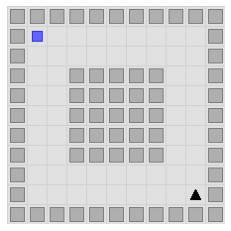

In [2]:
env = GridEnv(obs_type=GridObservation.symbolic, template=GridTemplate.outer_ring)
obs = env.reset()
env.render()

In [3]:
model_params = {
    "enc_type": "linear",
    "h_size": 128,
    "lr": 3e-4,
    "obs_size": math.prod(env.obs_space.shape),
    "act_size": env.action_space.n,
    "depth": 0,
}

agent_params_sac = {
    "batch_size": 32,
    "gamma": 0.99,
    "tau": 0.005,
    "target_update_interval": 2,
    "replay_buffer_size": 100000,
    "update_interval": 4,
    "warmup_steps": 1000,
    "alpha": 0.01,
}

agent_params_ppo = {
    "gamma": 0.99,
    "lambda": 0.95,
    "buffer_size": 256,
    "ent_coef": 0.05,
    "num_passes": 2,
    "clip_param": 0.2,
    "batch_size": 32,
}

In [4]:
repeats = 5
episodes = 200
max_steps = 100

all_returns = []
for i in range(repeats):
    ep_returns = []
    agent = PPOAgent(model_params, agent_params_ppo)
    # agent = SACAgent(model_params, agent_params_sac)
    for j in range(episodes):
        agent, ep_steps, ep_return = run_episode(env, agent, max_steps)
        ep_returns.append(ep_return)
    all_returns.append(ep_returns)

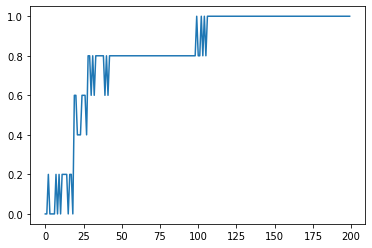

In [5]:
all_returns = np.stack(all_returns)
mean_returns = np.mean(all_returns, axis=0)

plt.plot(mean_returns)